In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [2]:
filename = 'AirQualityUCI.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf =pdf.drop('Date', axis = 1)
pdf =pdf.drop('Time', axis = 1)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (9357, 13)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [3]:
print ("Shape of dataset after cleaning: ", pdf.size)
pdf[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
        'PT08.S5(O3)','T', 'RH', 'AH']] =pdf[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset after cleaning:  121641
Shape of dataset after cleaning:  121641


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
featureset = pdf[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)',
        'PT08.S5(O3)','T', 'RH', 'AH','PT08.S1(CO)','PT08.S3(NOx)']]

In [5]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.95611137, 0.25197984, 0.80356466, 0.2179869 , 0.57962963,
        0.53911127, 0.87326247, 0.86214063, 0.99271526, 0.69642857,
        0.4356573 ],
       [0.95327985, 0.22462203, 0.79408419, 0.18046456, 0.54074074,
        0.43040764, 0.87203598, 0.85798407, 0.99255554, 0.66607143,
        0.47658689],
       [0.95422369, 0.20734341, 0.79256731, 0.19714116, 0.58148148,
        0.46786632, 0.86631235, 0.87980603, 0.99267768, 0.71517857,
        0.46479362],
       [0.95422369, 0.20158387, 0.79332575, 0.22156045, 0.5962963 ,
        0.51524054, 0.86263287, 0.90058885, 0.99285817, 0.70357143,
        0.44814429],
       [0.95139217, 0.18070554, 0.78308684, 0.19714116, 0.58518519,
        0.48108704, 0.86345053, 0.89920333, 0.99286855, 0.65714286,
        0.48733958]])

In [6]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-6-587da540e723>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


In [7]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'single')

<ipython-input-7-955f6168f9fd>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'single')


In [8]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

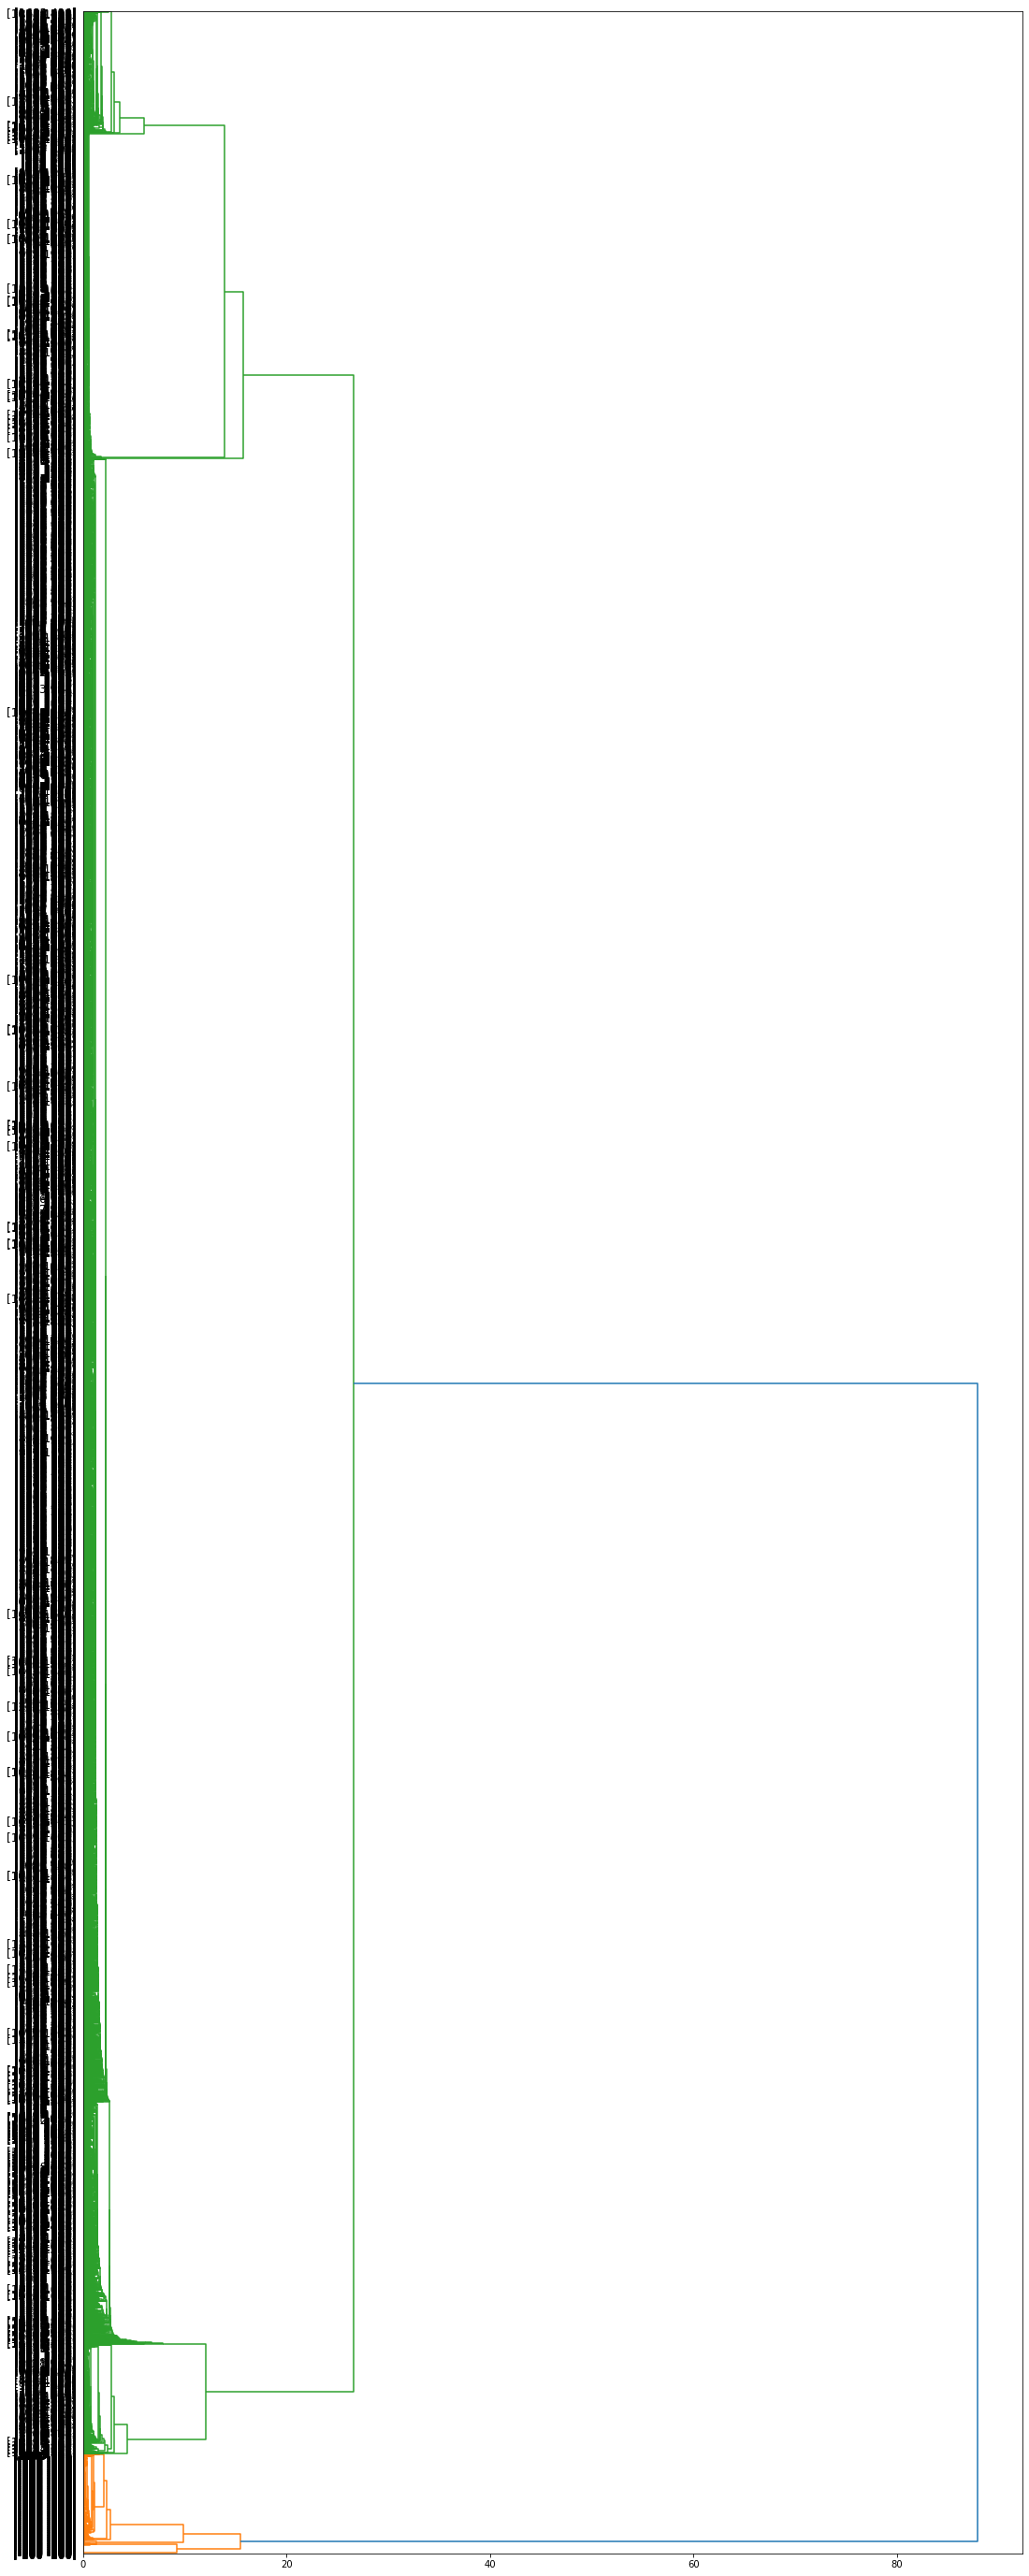

In [9]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (pdf['PT08.S1(CO)'][id], pdf['PT08.S3(NOx)'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')